# **Exploratory Data Analysis**

Install conda and rdkit

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-27 11:48:34--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   112MB/s    in 0.7s    

2022-09-27 11:48:35 (112 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [2]:
import pandas as pd
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
5819,CHEMBL4859103,2.57,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...
5820,CHEMBL4863615,2.39,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...
5821,CHEMBL4854913,0.41,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...
5822,CHEMBL4848527,0.63,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...


**Calculate Lipinski descriptors**

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:


*   Molecular weight < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [7]:
# Calculate Lipinski Descriptors

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5819,562.154,7.8680,4.0,5.0
5820,506.094,7.3886,3.0,4.0
5821,523.121,5.9852,2.0,4.0
5822,547.143,7.0315,3.0,4.0


In [9]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [10]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active,562.154,7.8680,4.0,5.0
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active,506.094,7.3886,3.0,4.0
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active,523.121,5.9852,2.0,4.0
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active,547.143,7.0315,3.0,4.0


**Convert IC50 to pIC50**

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [11]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [12]:
df_combined.standard_value.describe()

count    5.824000e+03
mean     2.588482e+12
std      1.068126e+14
min      0.000000e+00
25%      1.470000e+02
50%      2.400000e+03
75%      1.700000e+04
max      5.888437e+15
Name: standard_value, dtype: float64

In [13]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        elif i == 0:
          i = 0.1
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [14]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.00
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.8680,4.0,5.0,2.57
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.3886,3.0,4.0,2.39
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.9852,2.0,4.0,0.41
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.0315,3.0,4.0,0.63


In [15]:
df_norm.standard_value_norm.describe()

count    5.824000e+03
mean     2.795865e+05
std      4.242714e+06
min      5.000000e-06
25%      1.470000e+02
50%      2.400000e+03
75%      1.700000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [16]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.8680,4.0,5.0,8.590067
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.3886,3.0,4.0,8.621602
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.9852,2.0,4.0,9.387216
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.0315,3.0,4.0,9.200659


In [17]:
df_final.pIC50.describe()

count    5824.000000
mean        5.820371
std         1.583773
min         1.000000
25%         4.769551
50%         5.619789
75%         6.832683
max        14.301030
Name: pIC50, dtype: float64

In [18]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

**Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [19]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

**Frequency plot of the bioactivity classes**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


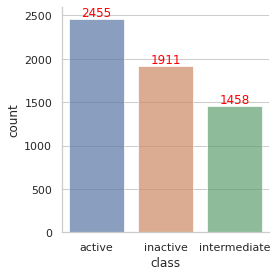

In [20]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 
sns.factorplot('class', data=df_final, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df_final['class'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

**Scatter plot of MW versus LogP**

It can be seen that the bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

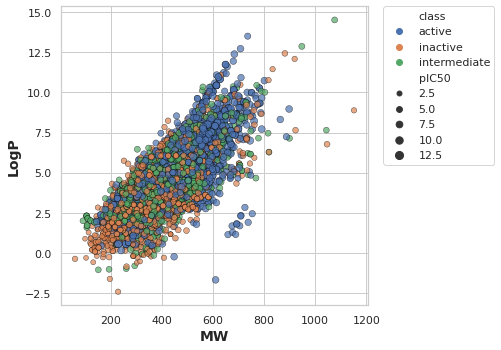

In [21]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

Box plots on pIC50 value

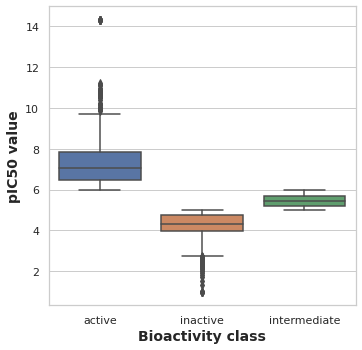

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Box plots on MW

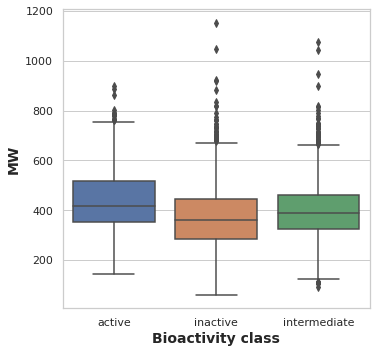

In [23]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

Box plots on LogP

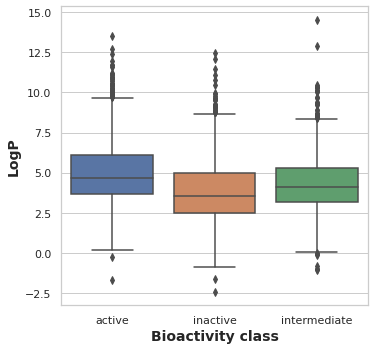

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

Box plots on NumHDonors

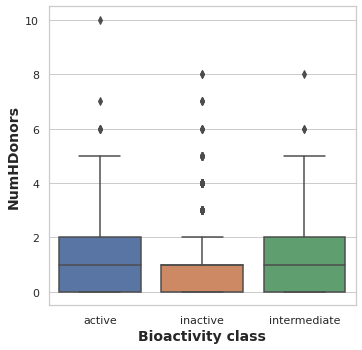

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Box plots on NumHAcceptors

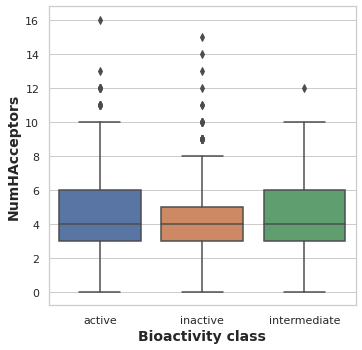

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [27]:
df_act_vs_inact = df_final[df_final['class'] != 'intermediate']
df_act_vs_inact

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.8680,4.0,5.0,8.590067
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.3886,3.0,4.0,8.621602
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.9852,2.0,4.0,9.387216
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.0315,3.0,4.0,9.200659


In [28]:
df_act_vs_int = df_final[df_final['class'] != 'inactive']
df_act_vs_int

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
5,CHEMBL130112,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1,intermediate,338.436,4.07992,0.0,5.0,5.619789
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.86800,4.0,5.0,8.590067
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.38860,3.0,4.0,8.621602
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.98520,2.0,4.0,9.387216
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.03150,3.0,4.0,9.200659


In [29]:
df_inact_vs_int = df_final[df_final['class'] != 'active']
df_inact_vs_int

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
5,CHEMBL130112,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1,intermediate,338.436,4.07992,0.0,5.0,5.619789
7,CHEMBL337486,CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1,inactive,408.955,4.57120,0.0,6.0,4.301030
9,CHEMBL131051,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)c1ccccc1,inactive,408.405,4.67010,0.0,6.0,4.301030
10,CHEMBL341437,CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N1CCOCC1,inactive,348.428,2.36600,0.0,7.0,4.301030
...,...,...,...,...,...,...,...,...
5806,CHEMBL4864004,COc1ccc2[nH]c(CCNC(=O)CCCn3cc(CCCCN4CCc5cc(OC)...,inactive,761.924,5.92280,2.0,10.0,3.799697
5807,CHEMBL4866752,COc1ccc2[nH]cc(CCNC(=O)Cn3cc(CCCCN(C)CCCC4c5cc...,intermediate,631.822,4.40800,2.0,9.0,5.657577
5808,CHEMBL4854555,COc1ccc2[nH]cc(CCNC(=O)Cn3cc(CN4CC[C@@]56C=C[C...,intermediate,584.677,2.86100,3.0,9.0,5.266642
5809,CHEMBL4845956,COc1ccc2[nH]cc(CCNC(=O)CCCCn3cc(CN4CC[C@@]56C=...,intermediate,626.758,4.03130,3.0,9.0,5.999132


Mannwhitney Active vs Inactive

In [30]:
def mannwhitney_act_vs_inact(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_act_vs_inact[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_act_vs_inact[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_df_act_vs_inact_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [31]:
mannwhitney_act_vs_inact('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4691505.0,0.0,0.05,Different distribution (reject H0)


In [32]:
mannwhitney_act_vs_inact('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3058287.5,1.232200e-66,0.05,Different distribution (reject H0)


In [33]:
mannwhitney_act_vs_inact('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3140805.5,1.663478e-82,0.05,Different distribution (reject H0)


In [34]:
mannwhitney_act_vs_inact('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2688100.5,3.809342e-18,0.05,Different distribution (reject H0)


In [35]:
mannwhitney_act_vs_inact('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2566325.5,5.985682e-08,0.05,Different distribution (reject H0)


Mannwhitney Active vs Intermediate

In [36]:
def mannwhitney_act_vs_int(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and intermediate
  selection = [descriptor, 'class']
  df = df_act_vs_int[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_act_vs_int[selection]
  intermediate = df[df['class'] == 'intermediate']
  intermediate = intermediate[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, intermediate)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_df_act_vs_int_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [37]:
mannwhitney_act_vs_int('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,3579390.0,0.0,0.05,Different distribution (reject H0)


In [38]:
mannwhitney_act_vs_int('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2108469.5,1.063655e-20,0.05,Different distribution (reject H0)


In [39]:
mannwhitney_act_vs_int('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2130500.5,1.975227e-23,0.05,Different distribution (reject H0)


In [40]:
mannwhitney_act_vs_int('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1903212.0,0.000521,0.05,Different distribution (reject H0)


In [41]:
mannwhitney_act_vs_int('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1887360.5,0.003723,0.05,Different distribution (reject H0)


Mannwhitney Inactive vs Intermediate

In [42]:
def mannwhitney_inact_vs_int(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# inactives and intermediate
  selection = [descriptor, 'class']
  df = df_inact_vs_int[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

  selection = [descriptor, 'class']
  df = df_inact_vs_int[selection]
  intermediate = df[df['class'] == 'intermediate']
  intermediate =  intermediate[descriptor]

# compare samples
  stat, p = mannwhitneyu(inactive, intermediate)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_df_inact_vs_int_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [43]:
mannwhitney_inact_vs_int('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


In [44]:
mannwhitney_inact_vs_int('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1194899.0,1.378513e-12,0.05,Different distribution (reject H0)


In [45]:
mannwhitney_inact_vs_int('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1138536.5,8.941454e-20,0.05,Different distribution (reject H0)


In [46]:
mannwhitney_inact_vs_int('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1270520.0,0.000004,0.05,Different distribution (reject H0)


In [47]:
mannwhitney_inact_vs_int('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1339103.0,0.05017,0.05,Same distribution (fail to reject H0)


**Interpretation of Statistical Results**

**Box Plots on pIC50 values**

Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives and IC50 between 1,000 nM to 10,000 nM = Intermediate, corresponding to pIC50 > 6 = Actives, pIC50 < 5 = Inactives and pIC50 between 5 to 6 = Intermediate) were used to define actives intermediate and inactives.


**Lipinski's descriptors**

Though we could see there is a slight (very minimal) difference in the p value and alpha for the classes inactive and intermediate in Number of Hydrogen Acceptors which makes the distribution same, rest of all the classes and descriptors results in different distribution. Thus we can conclude that all of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives, intermediate and inactives classes.